# Projeto 2 - Métodos de Aprendizagem Supervisionada

### Grupo
- Ismael Pereira Santos de Melo - RA175460
- Willian Massahiro Hayashida - RA188705


# PART I - Regression Task

### RoboCup soccer context

Consider that your are a goalkeeper in a robotic soccer match at RoboCup Teen Size League. Your opponent will kick a ball against you.

Your goal is to predict the position of the ball to intercept it, that is, to defend your goal! As a reference, you, the
goalkeeper, is at x = 0; y = 0.

### What should be done

* Define linear and polynomial regressions to learn your models, derive the equations, and implement a gradient descent method from scratch
* Train a linear and polynomial regression in each dataset
* Evaluate the impact of the model complexity in the results (degree of the model)
* Evaluate the impact of the learning rate (test at least 3 values) in the process
* Plot the models learned to predict the trajectory (like Figure 2.1) along with the metrics used to evaluate them, discussing the results.

## Loading Data

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

from math import sqrt

# Loading data to dataframe
Kick1 = pd.read_csv('data/kick1.dat', delimiter=' ', names=['x', 'y','z'])
Kick2 = pd.read_csv('data/kick2.dat', delimiter=' ', names=['x', 'y','z'])

### Visualizing kicks

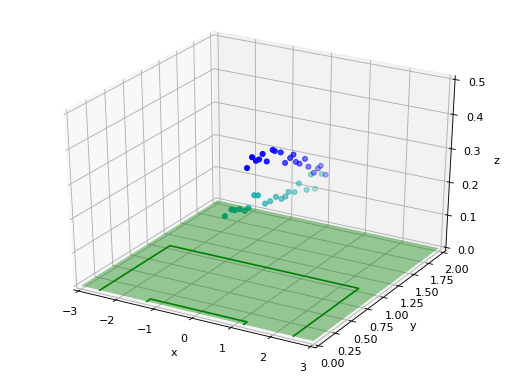

In [2]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")
ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9');
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='b');

X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_xlim(-3, 3)
ax.set_ylim(0 ,2)
ax.set_zlim(0, 0.5)

plt.show()

### Initializing variables

```Kick_data``` will store the input data (points) and the model (theta and cost) for each dimension (X, Y and Z)

In [3]:
kick_data = []

X = Kick1.x.values
Y = Kick1.y.values
Z = Kick1.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

X = Kick2.x.values
Y = Kick2.y.values
Z = Kick2.z.values

kick_data.append({
    'X' : {
        'data' : X,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Y' : {
        'data' : Y,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
    'Z' : {
        'data' : Z,
        'linear_model': {
            'theta' : {},
            'cost' : {}  
        },
        'polynomial_model': {
            'theta' : {},
            'cost' : {}  
        }
    },
})

In [4]:
kick_data[0]['X']['data']

array([-0.21 , -0.305, -0.368, -0.37 , -0.48 , -0.532, -0.575, -0.583,
       -0.618, -0.702, -0.783, -0.842, -0.882, -0.93 , -0.969, -0.989,
       -1.032, -1.088, -1.104, -1.192])

## Learning Methods

For this Project we implemented two variations of the Gradient Descent: Stochastic Gradient Descent, and Batch Gradient Descent.



### Stochastic Gradient Descent

In [5]:
def stochasticGradientDescent(X_b, y, lr='opt', eta0=0.001, n_epochs=50, tol=0.0005):
    m = X_b.shape[0] 
    cost = []
    X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] # add an one's column
    theta = np.random.rand(X_b.shape[1]) # random initialization of parameters
    
    X_b, y = shuffle(X_b, y)
    cost_func = 100000
    for epoch in range(n_epochs):
        if cost_func < tol:
            break
        
        for i in range(m):
            
            xi = X_b[i: i+1]
            yi = y[i: i+1]

            # calculate its gradient
            loss = xi[0].dot(theta) - yi
            gradients = xi.T.dot(loss)

            alpha = eta0
                
            theta = theta - (alpha * gradients)
            
        
        # calculate the cost function
        loss = X_b.dot(theta) - y
        cost_func = (np.sum(loss) ** 2)/2
        cost.append(cost_func)

    return theta, cost

### Batch Gradient Descent

In [6]:
def gradientDescent(X_b, y, lr='opt', eta0=0.005, n_epochs=50, tol=0.01):
    m = X_b.shape[0] 
    cost = []
    X_b = np.c_[np.ones((X_b.shape[0], 1)), X_b] # add an one's column
    theta = np.random.rand(X_b.shape[1]) # random initialization of parameters
    
    X_b, y = shuffle(X_b, y)
    cost_func = 100000
    for epoch in range(n_epochs):
        if cost_func < tol:
            break
    
        # calculate its gradient
        loss = X_b.dot(theta) - y
        gradients = X_b.T.dot(loss) / m
        
        alpha = eta0
      # update parameters
        
        theta = theta - alpha * gradients
      
        #calculate the cost function
        cost_func = (np.sum(loss) ** 2)/2
        cost.append(cost_func)
 
    return theta, cost

## Training - Linear Regression

### Time as our training set

We will train X, Y and Z as function of time.

We know that the points were collected in a constant rate, that means it is a linear timeline.

Because the Gradient Descent is super sensitive with scaling, and because in the polynomial regression we decided an equation of order 2, we decided to keep time in range 1 to 2. 

In [7]:
t = np.linspace(1, 2, 20)
t = np.c_[t, t**2]
t

array([[1.        , 1.        ],
       [1.05263158, 1.10803324],
       [1.10526316, 1.22160665],
       [1.15789474, 1.34072022],
       [1.21052632, 1.46537396],
       [1.26315789, 1.59556787],
       [1.31578947, 1.73130194],
       [1.36842105, 1.87257618],
       [1.42105263, 2.01939058],
       [1.47368421, 2.17174515],
       [1.52631579, 2.32963989],
       [1.57894737, 2.49307479],
       [1.63157895, 2.66204986],
       [1.68421053, 2.8365651 ],
       [1.73684211, 3.0166205 ],
       [1.78947368, 3.20221607],
       [1.84210526, 3.3933518 ],
       [1.89473684, 3.5900277 ],
       [1.94736842, 3.79224377],
       [2.        , 4.        ]])

### Linear Regression Learning with SGD

In [8]:
n_epochs = 10000
tol = 1e-8
eta0 = 0.01

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = stochasticGradientDescent(x, y, eta0=eta0, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['SGD'] = theta
        kick_data[i][dim]['linear_model']['cost']['SGD'] = cost



---------
Kick:  1  | index:  0
  training:  X
  - time of training linear regression with SGD:  0.7600181102752686
  - minimun cost:  2.9659793161792096e-05
  - num of iterations:  10000

  training:  Y
  - time of training linear regression with SGD:  0.7639279365539551
  - minimun cost:  7.614089811878668e-05
  - num of iterations:  10000

  training:  Z
  - time of training linear regression with SGD:  0.76593017578125
  - minimun cost:  0.00018898782155164448
  - num of iterations:  10000

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  0.7714073657989502
  - minimun cost:  5.7942738665431944e-05
  - num of iterations:  10000

  training:  Y
  - time of training linear regression with SGD:  0.06350326538085938
  - minimun cost:  8.583246326800492e-09
  - num of iterations:  841

  training:  Z
  - time of training linear regression with SGD:  0.7661130428314209
  - minimun cost:  1.2738442826108254e-06
  - num of iterations:  10000


### Linear Regression Learning with BGD

In [9]:
n_epochs = 50000
tol = 1e-7
eta0=0.01

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        starter_time = time.time()
        x = t[:,0]
        y = kick_data[i][dim]['data']
        theta, cost = gradientDescent(x, y, eta0=0.005, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['linear_model']['theta']['GD'] = theta
        kick_data[i][dim]['linear_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  0.39501380920410156
- minimun cost:  1.2131526695117825e-07
- num of iterations:  50000

training:  Y
- time of training linear regression with GD:  0.38983607292175293
- minimun cost:  7.185008565750381e-07
- num of iterations:  50000

training:  Z
- time of training linear regression with GD:  0.3036530017852783
- minimun cost:  9.999132747996147e-08
- num of iterations:  40390

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  0.3447129726409912
- minimun cost:  9.998866353010556e-08
- num of iterations:  45033

training:  Y
- time of training linear regression with GD:  0.4549286365509033
- minimun cost:  6.061233468778641e-07
- num of iterations:  50000

training:  Z
- time of training linear regression with GD:  0.3149113655090332
- minimun cost:  9.997812649163177e-08
- num of iterations:  34761



### Visualizing the Cost Function - Linear Regression

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


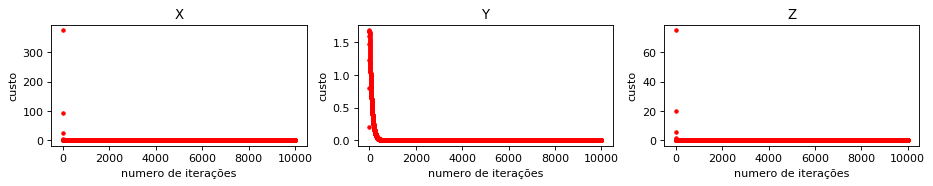

---------
Kick:  2  | index:  1


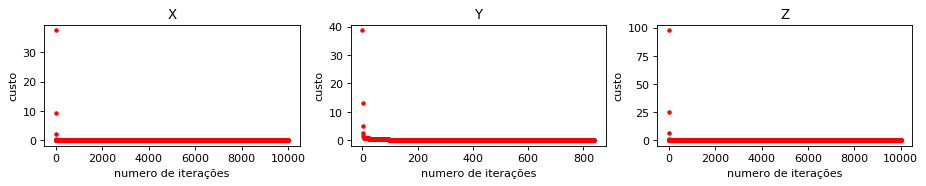

In [10]:
%matplotlib inline
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['SGD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

Batch Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


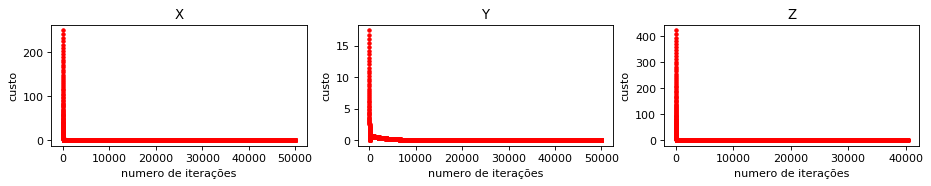

---------
Kick:  2  | index:  1


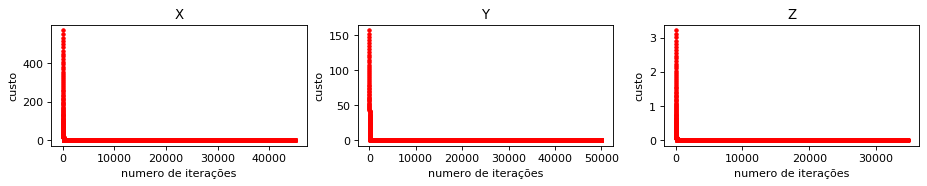

In [11]:
%matplotlib inline
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['linear_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['linear_model']['cost']['GD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## Training - Polynomial Regression

Since we are predicting the trajectory of a ball, makes sense to evaluate a parabollic curve: a second order equation.

### Polynomial Regression Learning with SGD

In [12]:
n_epochs = 10000
tol = 1e-12
eta0=.075

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        x = t
        y = kick_data[i][dim]['data']    
        starter_time = time.time()
        theta, cost = stochasticGradientDescent(x, y, eta0=eta0, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("  training: ", dim)
        print("  - time of training linear regression with SGD: ", time_1)
        print("  - minimun cost: ", min(cost))
        print("  - num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polynomial_model']['theta']['SGD'] = theta
        kick_data[i][dim]['polynomial_model']['cost']['SGD'] = cost

---------
Kick:  1  | index:  0
  training:  X
  - time of training linear regression with SGD:  0.777198314666748
  - minimun cost:  0.000527302841125186
  - num of iterations:  10000

  training:  Y
  - time of training linear regression with SGD:  0.7997615337371826
  - minimun cost:  0.00788319485874953
  - num of iterations:  10000

  training:  Z
  - time of training linear regression with SGD:  0.7857251167297363
  - minimun cost:  0.00010149373827422904
  - num of iterations:  10000

---------
Kick:  2  | index:  1
  training:  X
  - time of training linear regression with SGD:  0.7845921516418457
  - minimun cost:  0.00015620670829885795
  - num of iterations:  10000

  training:  Y
  - time of training linear regression with SGD:  0.7999317646026611
  - minimun cost:  1.9380370955165278e-10
  - num of iterations:  10000

  training:  Z
  - time of training linear regression with SGD:  0.7906970977783203
  - minimun cost:  0.02714735778316733
  - num of iterations:  10000



### Checking the Model

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


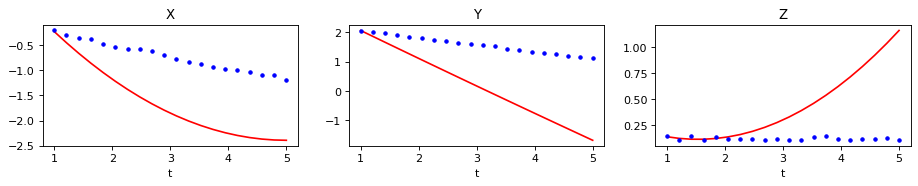

---------
Kick:  2  | index:  1


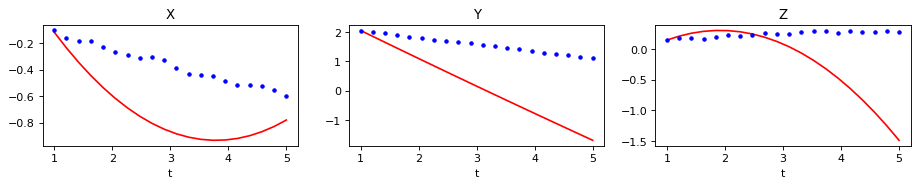

In [13]:
%matplotlib inline

t_line = np.linspace(1, 5, 20)
t_line = np.c_[t_line, t_line**2]
t_line = np.c_[np.ones((t_line.shape[0], 1)), t_line] 

print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    
    X_pol = t_line.dot(kick_data[i]['X']['polynomial_model']['theta']['SGD'])
    Y_pol = t_line.dot(kick_data[i]['Y']['polynomial_model']['theta']['SGD'])
    Z_pol = t_line.dot(kick_data[i]['Z']['polynomial_model']['theta']['SGD'])

    ax = plt.subplot(1, 3, 1)
    ax.plot(t_line[:,1],X_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['X']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('X')
    
    ax = plt.subplot(1, 3, 2)
    ax.plot(t_line[:,1],Y_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['Y']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('Y')
    
    ax = plt.subplot(1, 3, 3)
    ax.plot(t_line[:,1],Z_pol,'r')
    ax.plot(t_line[:,1], kick_data[i]['Z']['data'],'b.')
    ax.set_xlabel('t')
    ax.set_title('Z')
    plt.show()

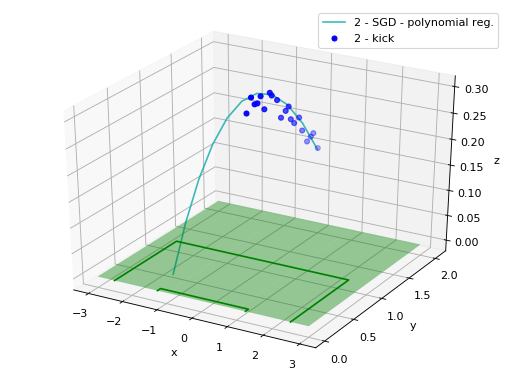

In [14]:
%matplotlib inline


fig = plt.figure(figsize=(8, 6), dpi=80)

ax = plt.axes(projection="3d")

# ax.scatter3D(Kick1.x, Kick1.y, Kick1.z, c='#10a9a9', label="1 - kick")

# kick two
ax.scatter3D(Kick2.x, Kick2.y, Kick2.z, c='#0000fa', label="2 - kick")

ax.plot(
    X_pol[:len(Y_pol[Y_pol>=0])], 
    Y_pol[:len(Y_pol[Y_pol>=0])], 
    Z_pol[:len(Y_pol[Y_pol>=0])], 
    c='#10a9a9', 
    label='2 - SGD - polynomial reg.', 
    alpha=0.8
)

ax.legend()

# field
X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
Z_field = np.zeros(X_field.shape)
ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# ax.set_xlim(-3, 3)
# ax.set_ylim(0 ,2)
# ax.set_zlim(0, 0.5)

plt.show()

### Batch Gradient Descent - Polynomial Regression

In [15]:
n_epochs = 50000
# 5e-3
tol = 1e-12
eta0=.1

for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    for dim in kick_data[i]:
        x = t
        y = kick_data[i][dim]['data']
        starter_time = time.time()
        theta, cost = gradientDescent(x, y, eta0=eta0, lr='opt', n_epochs=n_epochs, tol=tol) 
        time_1 = time.time() - starter_time

        num_iterations = len(cost)
        print("training: ", dim)
        print("- time of training linear regression with GD: ", time_1)
        print("- minimun cost: ", min(cost))
        print("- num of iterations: ", num_iterations)
        print()

        kick_data[i][dim]['polynomial_model']['theta']['GD'] = theta
        kick_data[i][dim]['polynomial_model']['cost']['GD'] = cost

---------
Kick:  1  | index:  0
training:  X
- time of training linear regression with GD:  0.3947937488555908
- minimun cost:  2.624325006378394e-07
- num of iterations:  50000

training:  Y
- time of training linear regression with GD:  0.39526844024658203
- minimun cost:  9.119499087649571e-07
- num of iterations:  50000

training:  Z
- time of training linear regression with GD:  0.3997836112976074
- minimun cost:  6.106825765515676e-12
- num of iterations:  50000

---------
Kick:  2  | index:  1
training:  X
- time of training linear regression with GD:  0.39527368545532227
- minimun cost:  1.0448783055667393e-10
- num of iterations:  50000

training:  Y
- time of training linear regression with GD:  0.39989399909973145
- minimun cost:  9.030940693826639e-07
- num of iterations:  50000

training:  Z
- time of training linear regression with GD:  0.3955259323120117
- minimun cost:  1.88965835517795e-07
- num of iterations:  50000



### Cost Function - Polynomial Regression

Stochastic Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


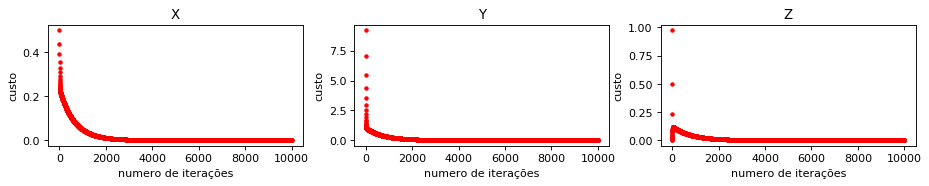

---------
Kick:  2  | index:  1


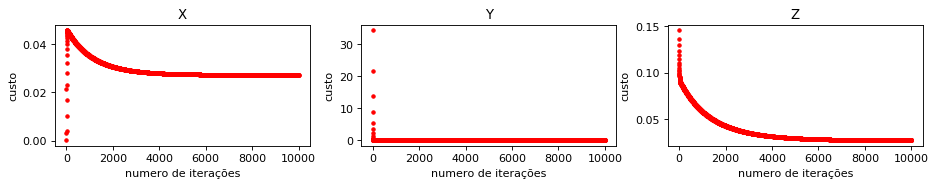

In [16]:
%matplotlib inline
print("Stochastic Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polynomial_model']['cost']['SGD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polynomial_model']['cost']['SGD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

Batch Gradient Descent - Cost Function
---------
Kick:  1  | index:  0


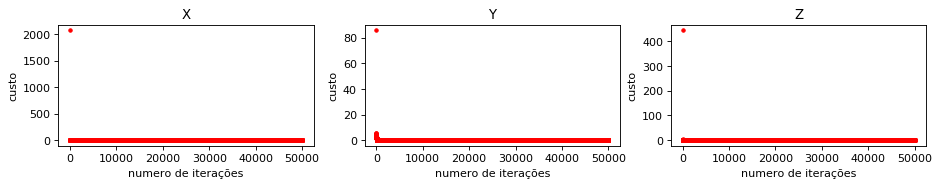

---------
Kick:  2  | index:  1


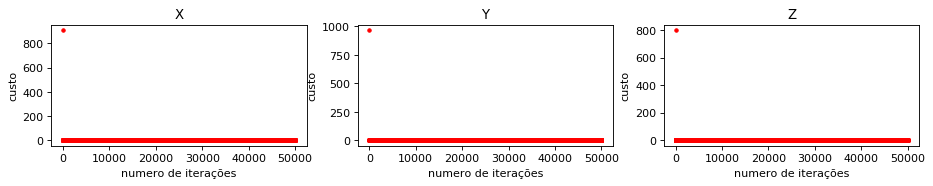

In [17]:
%matplotlib inline
print("Batch Gradient Descent - Cost Function")
for i in range(2):
    print('---------')
    print('Kick: ', i+1, ' | index: ', i)
    fig = plt.figure(figsize=(14, 2), dpi=80)
    j = 1
    for dim in kick_data[i]:
        num_iterations = len(kick_data[i][dim]['polynomial_model']['cost']['GD'])
        ax = plt.subplot(1, 3, j)
        ax.plot(np.arange(0,num_iterations), kick_data[i][dim]['polynomial_model']['cost']['GD'], "r.")
        ax.set_ylabel('custo')
        ax.set_xlabel('numero de iterações')
        ax.set_title(dim)
        j = j + 1
    plt.show()

## Validating Model

In [18]:
def predictModel(X, Y, theta):
  X = np.c_[np.ones((X.shape[0], 1)), X] 
  predict_values = X.dot(theta)
  return predict_values

def meanSquaredError(Y_predicted, Y):
  error = 0
  m = len(Y_predicted)
  for i in range(m):
    error += ((Y_predicted[i] - Y[i])**2)
  return error/m

In [19]:
# t_line = np.linspace(1, 5, 20)
t_line = np.arange(1,20,0.05)
t_line = np.c_[t_line, t_line**2]

Kick_Model = []

for i in range(2):
    Kick_Model.append({
        'X' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['X']['data'], kick_data[i]['X']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['X']['data'], kick_data[i]['X']['polynomial_model']['theta']['GD'])
            }
        },
        'Y' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Y']['data'], kick_data[i]['Y']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['Y']['data'], kick_data[i]['Y']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['Y']['data'], kick_data[i]['Y']['polynomial_model']['theta']['GD'])
            }
        },
        'Z' : {
            'linear_model': {
                'SGD': predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['SGD']), 
                'GD' : predictModel(t_line[:,0], kick_data[i]['Z']['data'], kick_data[i]['Z']['linear_model']['theta']['GD'])
            },
            'polynomial_model': {
                'SGD': predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polynomial_model']['theta']['SGD']), 
                'GD' : predictModel(t_line, kick_data[i]['Z']['data'], kick_data[i]['Z']['polynomial_model']['theta']['GD'])
            }
        }
    })

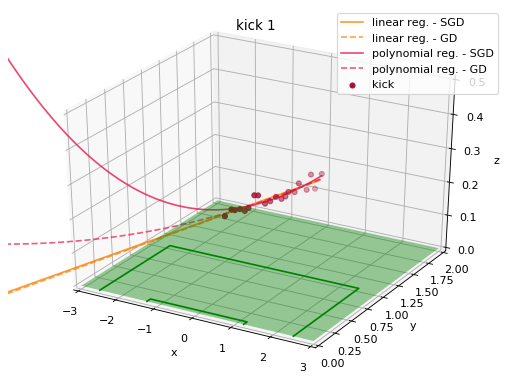

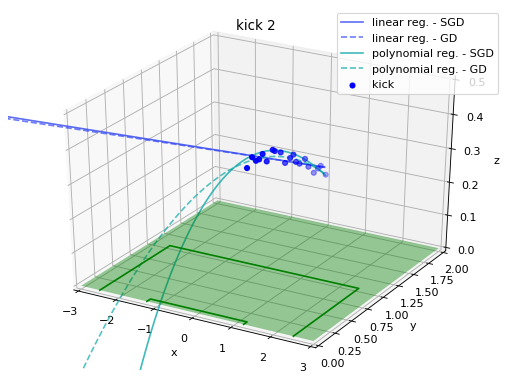

In [20]:
%matplotlib inline

color_schema = [
    {
        'points' : '#a51134',
        'linear' : '#ff7f00',
        'polynomial' : '#eb184a'
    },
    {
        'points' : '#0000fa',
        'linear' : '#3348f2',
        'polynomial' : '#10a9a9'
    }
]

for i in range(2):
    fig = plt.figure(figsize=(8, 6), dpi=80)
    ax = plt.axes(projection="3d")
    
    # plot kick data
    ax.scatter3D(
        kick_data[i]['X']['data'], 
        kick_data[i]['Y']['data'], 
        kick_data[i]['Z']['data'],
        c=color_schema[i]['points'], 
        label="kick"
    )
    
    # plot linear model
    ax.plot3D(
        Kick_Model[i]['X']['linear_model']['SGD'], 
        Kick_Model[i]['Y']['linear_model']['SGD'], 
        Kick_Model[i]['Z']['linear_model']['SGD'], 
        c=color_schema[i]['linear'], 
        label='linear reg. - SGD', 
        alpha=0.8
    )
    ax.plot3D(
        Kick_Model[i]['X']['linear_model']['GD'], 
        Kick_Model[i]['Y']['linear_model']['GD'], 
        Kick_Model[i]['Z']['linear_model']['GD'], 
        '--',
        c=color_schema[i]['linear'], 
        label='linear reg. - GD', 
        alpha=0.7
    )
    
    #plot polynomial model
    ax.plot3D(
        Kick_Model[i]['X']['polynomial_model']['SGD'], 
        Kick_Model[i]['Y']['polynomial_model']['SGD'], 
        Kick_Model[i]['Z']['polynomial_model']['SGD'], 
        c=color_schema[i]['polynomial'], 
        label='polynomial reg. - SGD', 
        alpha=0.8
    )
    ax.plot3D(
        Kick_Model[i]['X']['polynomial_model']['GD'], 
        Kick_Model[i]['Y']['polynomial_model']['GD'], 
        Kick_Model[i]['Z']['polynomial_model']['GD'], 
        '--',
        c=color_schema[i]['polynomial'], 
        label='polynomial reg. - GD', 
        alpha=0.7
    )

    # ax.plot(X_pol, Z_pol, zdir='y', zs=2, alpha=.25, c='k')
    # ax.plot(Y_pol, Z_pol, zdir='x', zs=-3, alpha=.25, c='k')
    # ax.plot(X_pol, Y_pol, zdir='z', zs=0, alpha=.25, c='k')

    ax.legend()

    # field
    X_field,Y_field = np.meshgrid(np.linspace(-3,3,4), np.linspace(0,2,2))
    Z_field = np.zeros(X_field.shape)
    ax.plot_surface(X_field,Y_field,Z_field,shade=False, color='g', alpha=0.4)
    ax.plot([-2.5 , -2.5, 2.5, 2.5], [0, 1, 1, 0], zdir ='z', zs=0, c='g')
    ax.plot([-1.25, -1.25, 1.25, 1.25], [0, 0.05, 0.05, 0], zdir ='z', zs=0, c='g')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(-3, 3)
    ax.set_ylim(0 ,2)
    ax.set_zlim(0, 0.5)
    
    title = 'kick ' + str(i+1)
    ax.set_title(title)

    plt.show()

# Conclusion

The Figures from the previous code block shows that we could achieve a good model for both kicks.
There is, however, a clear difference between the linear regression and the polynomial regression. Since we are evaluating a kick, which behaves like the projectile motion, would make sense to believe that a linear model would not be sufficient to fit to the motion. 

When comparing the learning methods, there is not much difference in the result or processing time. In a stochastic gradient descent, we have less epochs because for each epoch, we update the parameters for each sample. In contrast with the batch gradient descent that will update the parameters after calculating the loss for the entire set.

Finding the right value for the tolerance and the learning rate was difficult, because it is highly sensitive to the samples scale. 

We believe that the goalkeeper can defend the goal, if the ball doesnt miss the goal. The first sample was captured at time 0s on y=2, the last sample was captured at time 0,3333s on y=1, we can estimate that the ball will take more or less the same time (0,3333s) to reach y=0. Since the robot takes 1/3s to process the data and make a decision, after the last sample it will have just the right amount of time to act and defend the goal. 

# Collaboration

Willian was responsible to load the data and implement the batch gradient descent.

Ismael implemented the stochastic gradient descent and the charts.

We both work together to train the models and debug the code via [Deepnote](https://deepnote.com/).